In [1]:
import numpy as np
import pandas as pd 
import igraph as ig
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as stats
import cairo
import statistics as st
from network_tolerance_ig import *

In [2]:
df = pd.read_csv('./Renamed Data/Capital-bikeshare-2022.csv',
                 index_col=0)


In [3]:
#Instantiates CreateGraph class from network_tolerance_ig
cg = CreateGraph()
#Perform groupbys in the data and outputs processed df
processed = cg.preprocess(df)
#Create graph from processed df
g = cg.create_network(processed, directed=True)
#Instantiates GraphTolerance class from network_tolerance_ig
tolerance = GraphTolerance(g)

In [4]:
#Measures to monitor as we delete nodes. Measures MUST BE a list or tuple
random.seed(2023)
f=0.10
measures = ['diameter', 'average_path_length', 'is_connected']
measure_params = [{'directed':True}, {'directed':True},{'mode':'weak'}]
# =============================================================================
# measures = ['transitivity_avglocal_undirected', 'density']
# #parameters for each measure as a dictionary
# measure_params = [{'mode':'zero'}, {'loops':True}]
# =============================================================================

In [5]:
g1, random_fail = tolerance.random_fail(f=f, 
                         graph_measures=measures,
                         measure_params=measure_params)

random_fail = random_fail.add_suffix('_rf')

In [6]:
centrality = 'degree'
centrality_params = {'loops':True}

g2, target_attack_degree = tolerance.target_attack(f=f, centrality=centrality, 
                                   centrality_params = centrality_params,
                         graph_measures=measures,
                         measure_params=measure_params)

target_attack_degree = target_attack_degree.add_suffix('_ta_d')


In [7]:
centrality = 'betweenness'
centrality_params = {'directed':True}

g3, target_attack_bet = tolerance.target_attack(f=f, centrality=centrality, 
                                   centrality_params = centrality_params,
                         graph_measures=measures,
                         measure_params=measure_params)

target_attack_bet = target_attack_bet.add_suffix('_ta_bet')

In [8]:
results = random_fail.join([target_attack_degree, target_attack_bet])

Text(0.5, 0, 'Fraction of Nodes Removed')

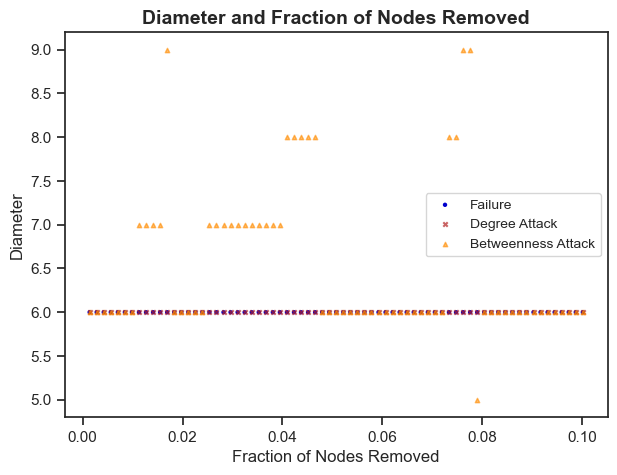

In [9]:
sns.set_theme(style = 'ticks', rc={'figure.dpi': 100})
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=results.f_rf, y=results.iloc[:,2], label='Failure', s=10,
            edgecolors='none', facecolors='mediumblue')
plt.scatter(x=results.f_ta_d, y=results.diameter_ta_d, label='Degree Attack', marker = 'x', s=10,
              facecolors='firebrick', alpha = 0.7)
plt.scatter(x=results.f_ta_bet, y=results.diameter_ta_bet, label='Betweenness Attack', marker = '^', s=10,
              facecolors='darkorange', alpha=0.6)
ax.legend(loc='center right',prop={'size':'small'})
ax.set_title('Diameter and Fraction of Nodes Removed', fontweight='bold', fontsize=14)
ax.set_ylabel('Diameter')
ax.set_xlabel('Fraction of Nodes Removed')


Text(0.5, 0, 'Fraction of Nodes Removed')

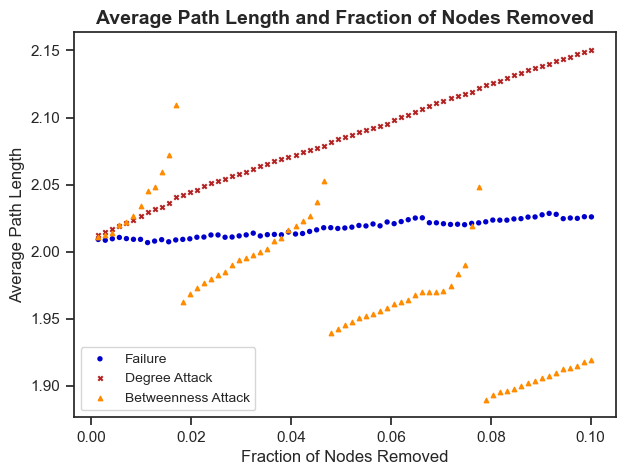

In [10]:
sns.set_theme(style = 'ticks', rc={'figure.dpi': 100})
fig, ax2 =plt.subplots(figsize=(7,5))
plt.scatter(x=results.f_rf, y=results.average_path_length_rf, label='Failure', s=15,
            edgecolors='none', facecolors='mediumblue')
plt.scatter(x=results.f_ta_d, y=results.average_path_length_ta_d, label='Degree Attack', marker = 'x', s=10,
              facecolors='firebrick')
plt.scatter(x=results.f_ta_bet, y=results.average_path_length_ta_bet, label='Betweenness Attack', marker = '^', s=10,
              facecolors='darkorange')
ax2.legend(loc='lower left',prop={'size':'small'})
#ax2.set_ybound(1.5, 2.2)
ax2.set_title('Average Path Length and Fraction of Nodes Removed', fontweight='bold', fontsize=14)
ax2.set_ylabel('Average Path Length')
ax2.set_xlabel('Fraction of Nodes Removed')
# =============================================================================

In [11]:
print(g.summary())
print(g1.summary())
print(g2.summary())
print(g3.summary())

IGRAPH DNW- 709 119221 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 638 96236 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 638 73168 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 638 93647 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)


In [12]:
#results.to_csv('results_2011.csv')

In [13]:
#results[:-1]

In [14]:
for i in [g, g1, g2, g3]:
    print(i.is_connected(mode='weak'))

True
True
True
False


In [15]:
for i in g3.decompose():
    print(i.summary())

IGRAPH DNW- 19 184 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 26 281 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 591 93161 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 1 0 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (e), ended_at (e), member_count (e), name (e), start_station_name (e), start_year (e), started_at (e), travel_time_in_sec (e), weight (e)
IGRAPH DNW- 1 0 -- 
+ attr: name (v), casual_count (e), end_station_name (e), end_year (

In [16]:
#ig.plot(g3, vertex_size=2, edge_width = 0.2, edge_arrow_size=0.2, edge_curved=True)